In [1]:
import rpy2
%load_ext rpy2.ipython

In [2]:
import os
import pandas as pd
from dotenv import load_dotenv
assert os.environ['CONDA_DEFAULT_ENV'] == "cultures_hic"
load_dotenv()

True

In [3]:
%%R 
library("FactoMineR")
library("factoextra")
library (data.table)
library(wesanderson)
library(ggrepel)
library(data.table)

R[write to console]: Loading required package: ggplot2

R[write to console]: Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

R[write to console]: data.table 1.14.8 using 24 threads (see ?getDTthreads).  Latest news: r-datatable.com



## Calculate feature importance

In [4]:
comparisons = ['Post-mortem neurons_vs_Fetal neurons',
 'Post-mortem neurons_vs_iPSC-derived neurons',
'Post-mortem neurons_vs_Stem-like cells',
 'Fetal neurons_vs_iPSC-derived neurons']

path_to_maps = os.getenv('PATH_TO_MAPS')
path_to_tads = os.getenv('PATH_TO_SAVE_TAD_BORDERS')
path_to_mapping = os.getenv('PATH_TO_MAIN_MAPS_MAPPING')
path_to_reduced_insulation_tables = os.getenv('PATH_TO_REDUCED_IS_TABLES')
path_to_save_pca_data = os.getenv('PATH_TO_SAVE_TAD_PCA_DATA')
path_to_tads_clusters = os.getenv('PATH_TO_TADS_CLUSTERS')
path_to_save_visualizations = os.getenv('PATH_TO_TADS_VISUALIZATIONS')
path_to_maps_expected = os.getenv('PATH_TO_EXPECTED_MAPS')

In [11]:
comparisons_div = [i.split("_vs_") for i in comparisons]
data_for_pca_all = {}
for selected_groups, selected_groups_name in zip(comparisons_div, comparisons):    
    selected_groups_name = selected_groups[0]+"_vs_"+selected_groups[1]
    print(selected_groups_name)
    data_for_pca_all[selected_groups_name] = pd.read_csv(f'{path_to_save_pca_data}/{selected_groups_name}_tads_clusters.tsv', sep='\t')

Post-mortem neurons_vs_Fetal neurons
Post-mortem neurons_vs_iPSC-derived neurons
Post-mortem neurons_vs_Stem-like cells
Fetal neurons_vs_iPSC-derived neurons


In [13]:
%%R
get_pca1_importance <- function(path_to_save_pca_data, name) {
    name_read = sprintf("%s/%s_tads_clusters.tsv", path_to_save_pca_data, name)

    tads <- fread(name_read, sep='\t', header=TRUE)
    tads <- as.data.frame(tads)
    rownames(tads) <- tads$source
    tads <- replace(tads, is.na(tads), 0)
    tads$source <- NULL
    
    res.pca <- PCA(tads, ncp=12)
    f1 <- fviz_contrib(res.pca, choice="var",
          axes = c(1) , top = 1000000)
    name_save = sprintf("%s/%s_featureImportance_pca1.tsv", path_to_save_pca_data, name)
    write.csv(f1$data, name_save)
    p = fviz_pca_ind(res.pca, col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )
    return(p)

}

In [15]:
%%R
path_to_save_pca_data <- Sys.getenv('PATH_TO_SAVE_TAD_PCA_DATA')
p1 = get_pca1_importance(path_to_save_pca_data, "Fetal neurons_vs_iPSC-derived neurons")
p2 = get_pca1_importance(path_to_save_pca_data, "Post-mortem neurons_vs_Fetal neurons")
p3 = get_pca1_importance(path_to_save_pca_data, "Post-mortem neurons_vs_iPSC-derived neurons")

R[write to console]: dev.new(): using pdf(file="Rplots1.pdf")

R[write to console]: dev.new(): using pdf(file="Rplots2.pdf")



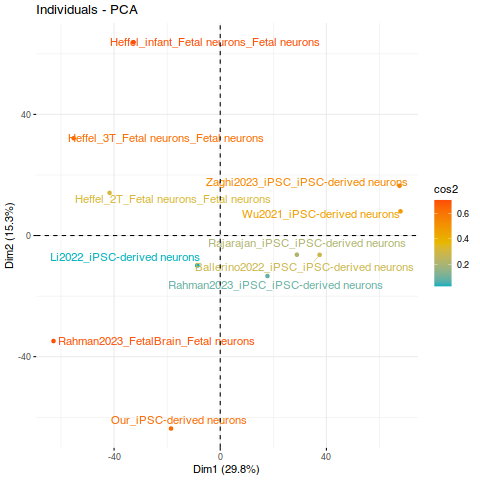

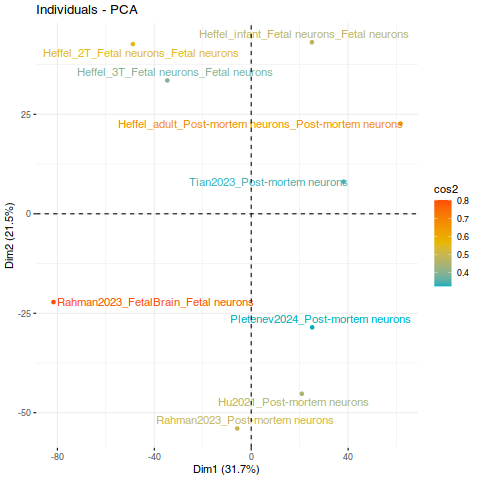

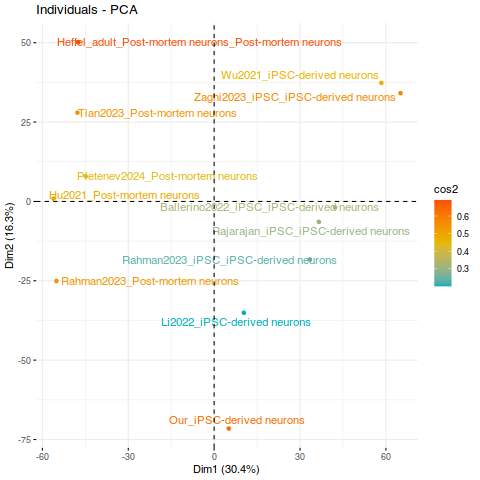

In [19]:
%%R
print(p1)
print(p2)
print(p3)